# Grid or Table Removal From Document

This code is a prototype I developed to remove the grids or tables from the images, so the OCR engine can make a better prediction without the Grid noises.

References:
https://medium.com/coinmonks/a-box-detection-algorithm-for-any-image-containing-boxes-756c15d7ed26
https://github.com/KananVyas/BoxDetection/blob/master/box_detection.ipynb
https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'
mpl.rcParams['figure.figsize'] = 10, 10
from matplotlib.pyplot import figure
import os
os.getcwd()

'C:\\Users\\kanakk\\Desktop\\Udemy\\OCR\\MachineAnnotation\\BoundingBox_Approach'

In [2]:
workdir=r'C:\Users\kanakk\Desktop\Udemy\OCR\MachineAnnotation\BoundingBox_Approach\W2\T2'
template_img='example1' #with out .png extension
output_annotation='annotation_'+template_img+'.txt'
os.chdir(workdir)
print(os.getcwd(), template_img+'.png\n', output_annotation)

C:\Users\kanakk\Desktop\Udemy\OCR\MachineAnnotation\BoundingBox_Approach\W2\T2 example1.png
 annotation_example1.txt


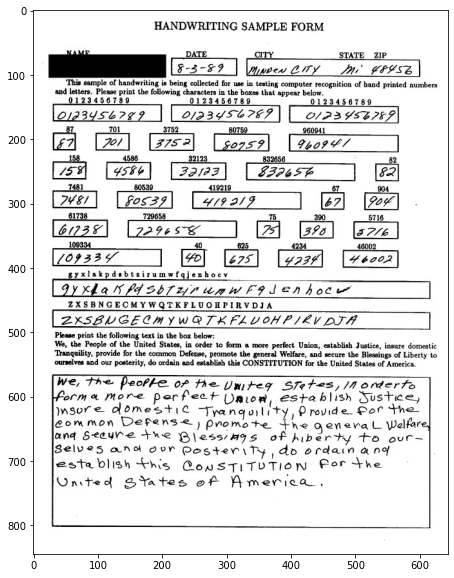

In [3]:

# Read the image
img = cv2.imread(template_img+'.PNG', 0)
plt.imshow(img);

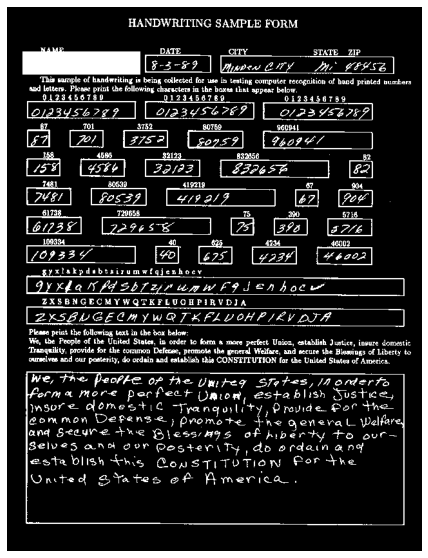

In [4]:
# Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Image_bin.png",img_bin)
plt.axis('off')
plt.imshow(img_bin);

In [5]:

def f(x):
    # Defining a kernel length
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)

    
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(verticle_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
    plt.axis('off')

interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=100));

interactive(children=(IntSlider(value=100, description='x', max=255, min=1), Output()), _dom_classes=('widget-…

True

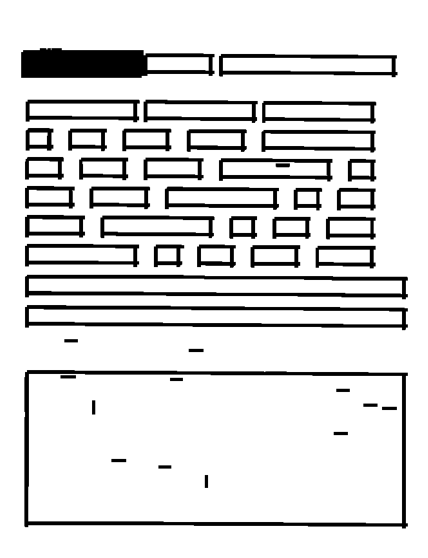

In [6]:

# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)
cv2.imwrite("img_final_bin.jpg",img_final_bin)

True

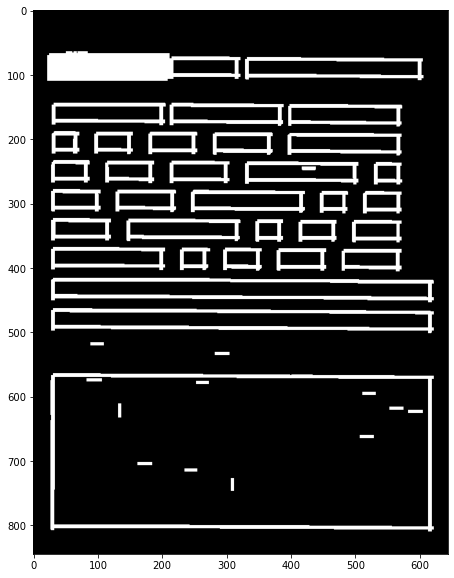

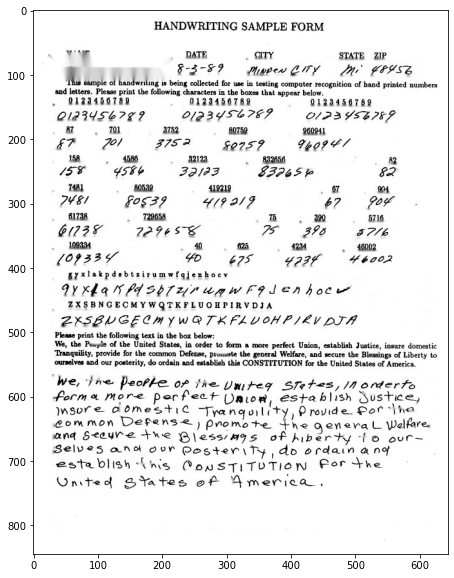

In [7]:
#creates no_grid image that will be used for drawing boxes to mark region of interest.
image = cv2.imread(template_img+'.png',0)
plt.imshow(image)
ret, th_img = cv2.threshold(img_final_bin, thresh=127, maxval=255, type=cv2.THRESH_BINARY_INV)
plt.imshow(th_img)

dst = cv2.inpaint(image,th_img,3,cv2.INPAINT_TELEA)
fig = figure(figsize=(10, 10))
plt.imshow(dst, cmap='gray')
cv2.imwrite(template_img+"_no_grids.PNG",dst)

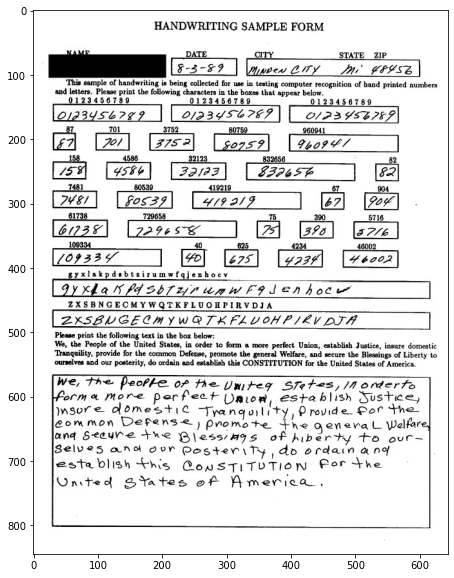

In [8]:
plt.imshow(img);